In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(training_images, training_labels),(testing_images,testing_labels)=datasets.cifar10.load_data()

In [3]:
training_images,testing_images= training_images/255,testing_images/255

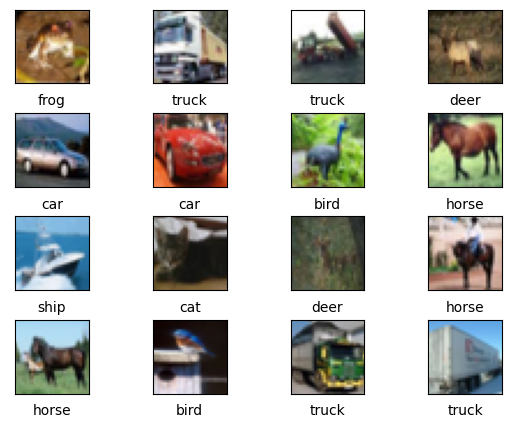

In [4]:
class_names=['Plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    
plt.show()

In [5]:
training_images=training_images[:10000]
training_labels=training_labels[:10000]
testing_images=testing_images[:2000]
testing_labels=testing_labels[:2000]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))


Epoch 1/10
313/313 [==============================] - 25s 52ms/step - loss: 1.9661 - accuracy: 0.2622 - val_loss: 1.7035 - val_accuracy: 0.3880
Epoch 2/10
313/313 [==============================] - 15s 48ms/step - loss: 1.6099 - accuracy: 0.4074 - val_loss: 1.4821 - val_accuracy: 0.4645
Epoch 3/10
313/313 [==============================] - 15s 49ms/step - loss: 1.4415 - accuracy: 0.4783 - val_loss: 1.4082 - val_accuracy: 0.4955
Epoch 4/10
313/313 [==============================] - 15s 48ms/step - loss: 1.3215 - accuracy: 0.5251 - val_loss: 1.3579 - val_accuracy: 0.5250
Epoch 5/10
313/313 [==============================] - 15s 48ms/step - loss: 1.2271 - accuracy: 0.5585 - val_loss: 1.3261 - val_accuracy: 0.5215
Epoch 6/10
313/313 [==============================] - 16s 50ms/step - loss: 1.1516 - accuracy: 0.5897 - val_loss: 1.2743 - val_accuracy: 0.5440
Epoch 7/10
313/313 [==============================] - 15s 49ms/step - loss: 1.0749 - accuracy: 0.6173 - val_loss: 1.2554 - val_accuracy:

In [7]:
loss, accuracy=model.evaluate(testing_images, testing_labels)
print(f"Loss:{loss}")
print(f"accuracy:{accuracy}")

63/63 [==============================] - 1s 22ms/step - loss: 1.2844 - accuracy: 0.5740
Loss:1.2843668460845947
accuracy:0.5740000009536743


In [9]:
import pickle
import joblib

filename = 'image_recognition.pkl'
joblib.dump(model, filename)

['image_recognition.pkl']

In [12]:
model.save('image_classifier.model')

INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


In [1]:
model=models.load_model('image_classifier.model')
img=cv.imread('horse.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(f'prediction is{class_names[index]}')

NameError: name 'models' is not defined